<a href="https://colab.research.google.com/github/sohenney/2025-1_CV/blob/main/HW_2_4_2021025030_%EC%9D%B4%EC%86%8C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

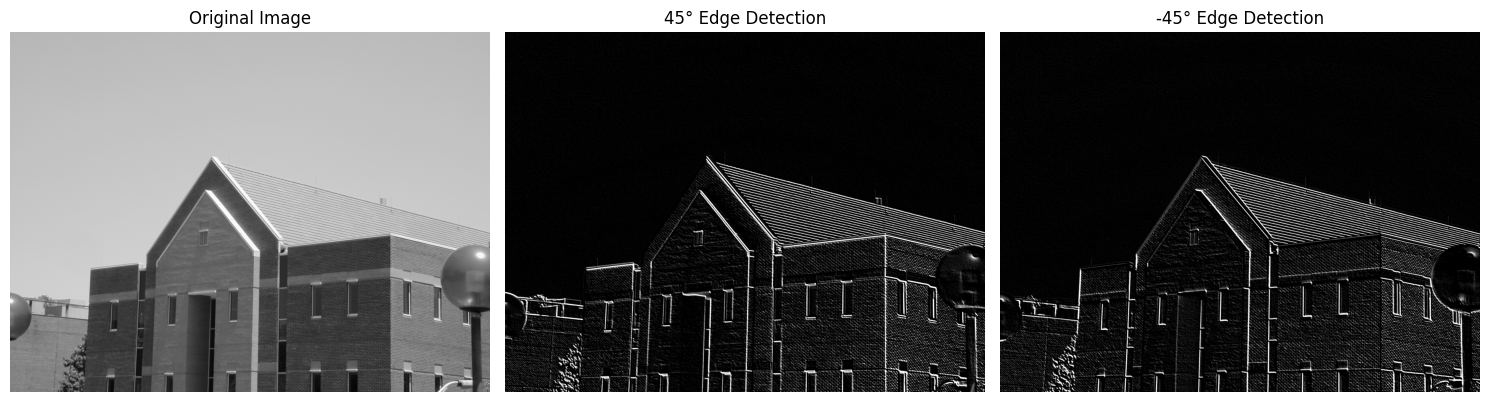

In [ ]:
import cv2  # OpenCV를 사용하여 이미지를 처리합니다.
import numpy as np  # 이미지 수치 계산을 위한 NumPy
import matplotlib.pyplot as plt  # 결과를 시각화하기 위한 Matplotlib
import urllib.request  # URL에서 이미지를 다운로드하는 urllib 모듈

# 이미지 URL 정의
image_url = 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/school.jpg'

# URL에서 흑백 이미지를 불러오는 함수 정의
def retrieve_grayscale_image(url):
    with urllib.request.urlopen(url) as response:
        image_bytes = np.asarray(bytearray(response.read()), dtype=np.uint8)  # 이미지를 바이트 배열로 변환
    return cv2.imdecode(image_bytes, cv2.IMREAD_GRAYSCALE)  # 이미지를 흑백으로 디코딩하여 반환

# Sobel 필터 적용 함수 정의
def apply_sobel_filter(image, filter_kernel):
    return cv2.filter2D(image, -1, filter_kernel)

# 이미지 불러오기
gray_image = retrieve_grayscale_image(image_url)

# 필터 커널 정의
sobel_45_deg_filter = np.array([[0, 1, 2, 1, 0],
                                [-1, 0, 0, 0, 1],
                                [-2, 0, 0, 0, 2],
                                [-1, 0, 0, 0, 1],
                                [0, -1, -2, -1, 0]])

sobel_minus_45_deg_filter = np.array([[0, -1, -2, -1, 0],
                                      [1, 0, 0, 0, -1],
                                      [2, 0, 0, 0, -2],
                                      [1, 0, 0, 0, -1],
                                      [0, 1, 2, 1, 0]])

# 각 필터를 적용하여 경계 감지
edges_45_deg = apply_sobel_filter(gray_image, sobel_45_deg_filter)
edges_minus_45_deg = apply_sobel_filter(gray_image, sobel_minus_45_deg_filter)

# 결과를 시각적으로 비교하여 표시
def plot_images(original, filtered_45, filtered_minus_45):
    plt.figure(figsize=(15, 10))

    # 원본 이미지 출력
    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')  # 축을 숨기기

    # 45° 방향 경계 감지 결과 출력
    plt.subplot(1, 3, 2)
    plt.imshow(filtered_45, cmap='gray')
    plt.title("45° Edge Detection")
    plt.axis('off')  # 축을 숨기기

    # -45° 방향 경계 감지 결과 출력
    plt.subplot(1, 3, 3)
    plt.imshow(filtered_minus_45, cmap='gray')
    plt.title("-45° Edge Detection")
    plt.axis('off')  # 축 숨기기

    plt.tight_layout()  # 서브플롯 간 간격 조정
    plt.show()  # 결과를 화면에 표시

# 결과 이미지 출력
plot_images(gray_image, edges_45_deg, edges_minus_45_deg)


# ### 결과 분석 ###
# Sobel 필터를 사용하여 이미지를 분석하고 특정 방향의 경계를 감지해봄.
# 이미지 내에서 경계가 뚜렷하게 나타나는 방향을 강조함으로 객체나 구조를 적절히 구분함.
#
# (a) 45° 방향 경계 강조:
#     이 필터는 대각선 방향으로 존재하는 경계를 강조함. 45도 방향으로 나타나는 구조적 특징을 정확하게 추출할 수 있음.
#     이를 통해 특정 방향의 선이나 모서리가 강조되어 이미지 내에서 중요한 형태 요소를 효과적으로 식별할 수 있음.
#
# (b) -45° 방향 경계 강조:
#     -45도 방향의 필터를 적용하여 반대 방향에 존재하는 경계를 강조함. 이로 인해 이미지 내에서 대칭적 구조를 추출할 수 있음.
#     주로 대각선이 반대 방향으로 이루어진 패턴을 강조하고 특정 형태나 대칭을 구분하는 구조 분석에 유리함.
#
# Sobel 필터는 경계 검출에 매우 유용한 도구로 이미지를 분석하고 중요한 구조를 추출하는 데 사용됨.
# 특히 45도와 -45도의 필터를 동시에 적용함으로써 서로 다른 방향에서 발생하는 경계를 비교하고 이미지를 더욱 세밀하게 분석할 수도 있음.